In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('algerian/Bejaia Region ForestFire Dataset.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region ForestFire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on region from 122th index, we can make new column based on region

1. "Bejaia Region Dataset"
2. "Sidi-Bel Abbes Region Dataset"

Add new column name as Region


In [5]:
df.loc[:122,'Region']=0
df.loc[122:, 'Region']=1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df['Region']=df['Region'].astype(int)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
#Remove Null Values 
df = df.dropna().reset_index(drop=True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
#Removing 122th row
df=df.drop(122).reset_index(drop=True)

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
#removeing space from columns 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Converting columns from object to Integer datatypes

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
#covert "Temperature","RH","Ws" to int
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

#### Converting other columns from object to Float datatypes

In [17]:
objects = [features for features in df.columns if df[features].dtypes=="O"]

In [18]:
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


## Exploratory Data Analysis 

In [20]:
## drop days month year because not required as much 
df_copy = df

##### It seems there might be some errors in the "Classes" column, possibly due to extra spaces. Let's check for these and clean up the data if necessary.



In [21]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [22]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [23]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

 ## Data Visualization

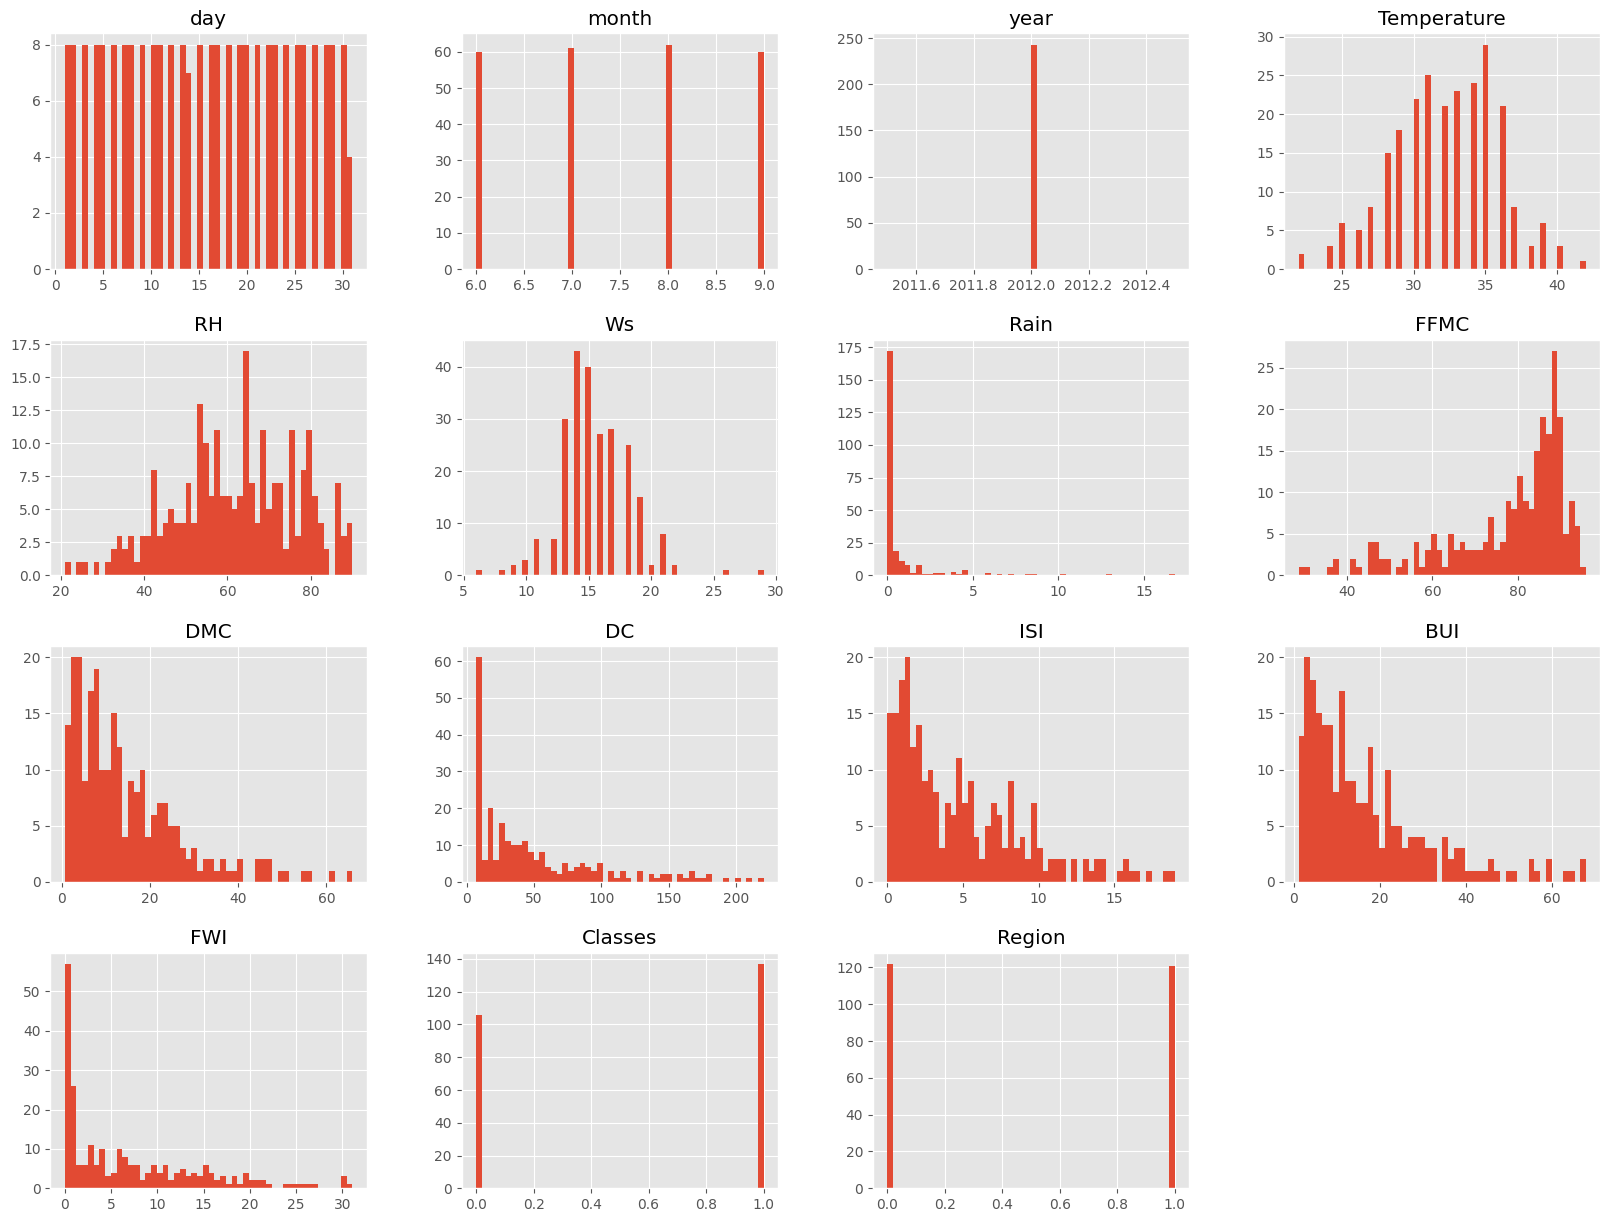

In [25]:
plt.style.use('ggplot')  # or 'bmh'
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

In [29]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

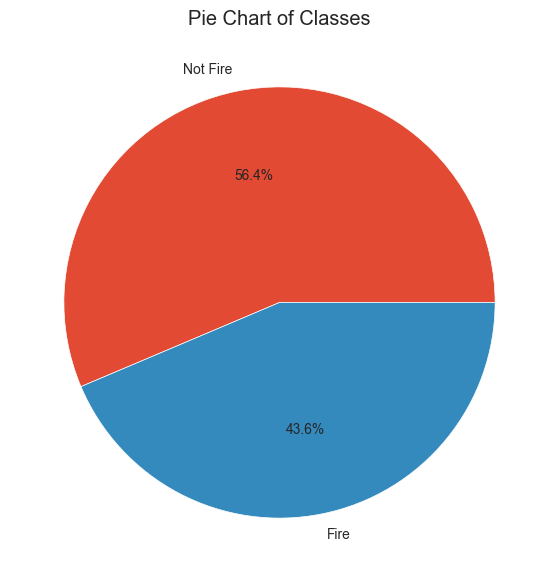

In [42]:
classlabel =['Not Fire', 'Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabel,autopct="%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()

In [43]:
import seaborn as sns 

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.0 KB


<Axes: >

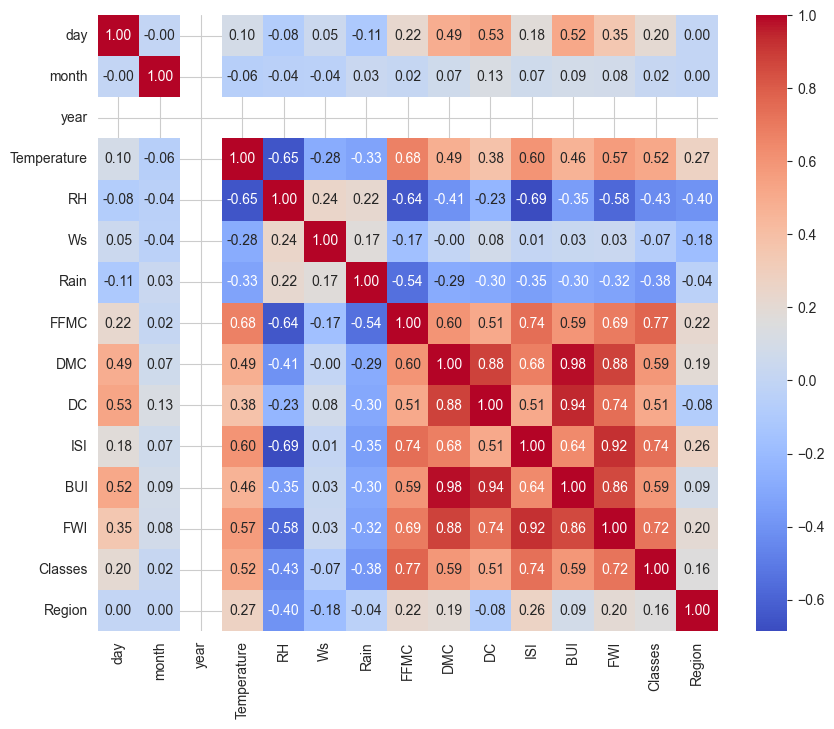

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')

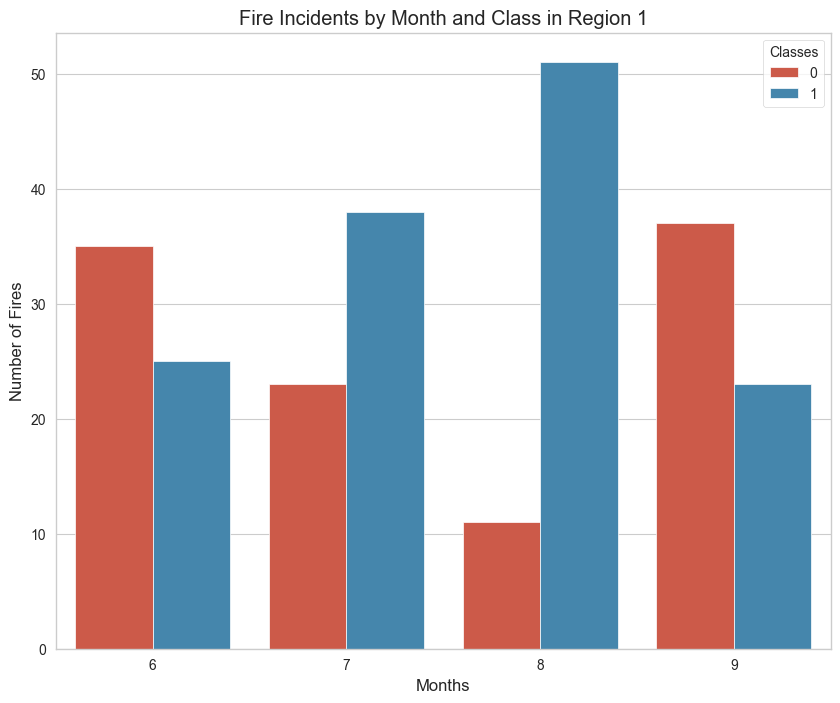

In [46]:
# Filter the DataFrame for Region 
dftemp = df.loc[df["Region"] == 1]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.countplot(x='month', hue='Classes', data=df_copy)
plt.xlabel("Months")
plt.ylabel("Number of Fires")
plt.title("Fire Incidents by Month and Class in Region 1")
plt.legend(title='Classes')

# Show the plot
plt.show()

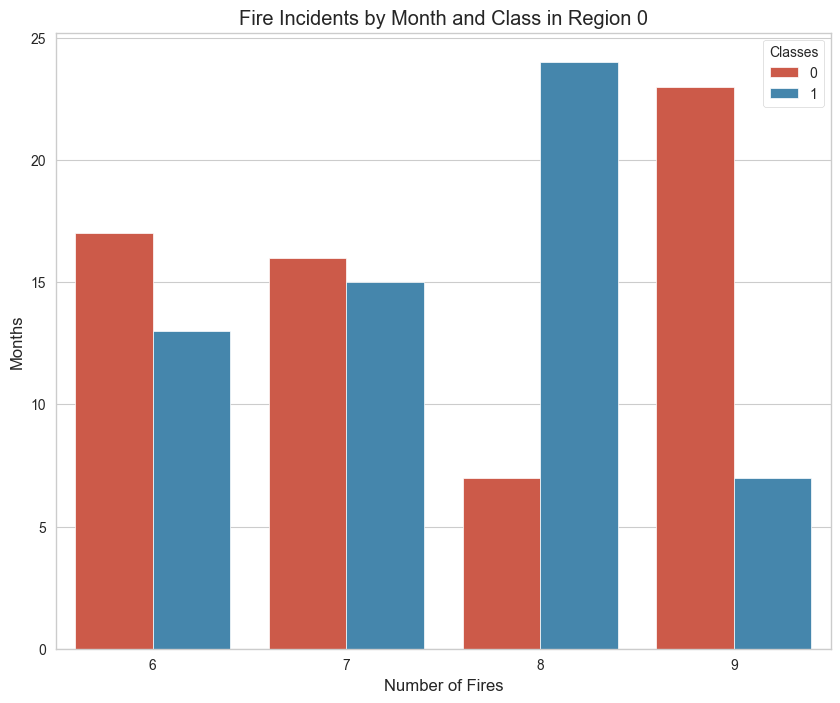

In [47]:
# Filter the DataFrame for Region 
dftemp = df.loc[df["Region"] == 0]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.xlabel("Number of Fires")
plt.ylabel("Months")
plt.title("Fire Incidents by Month and Class in Region 0")
plt.legend(title='Classes')

# Show the plot
plt.show()

<Axes: ylabel='RH'>

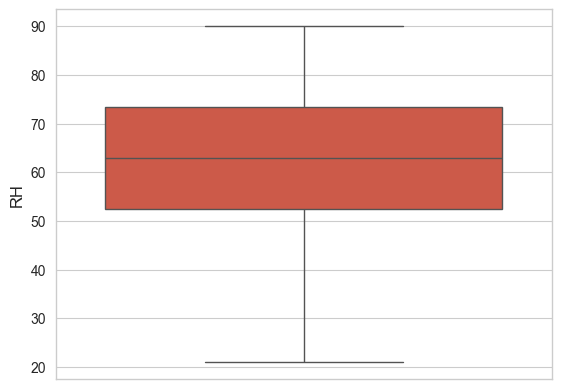

In [48]:
sns.boxplot(df['RH'])

<Axes: ylabel='FWI'>

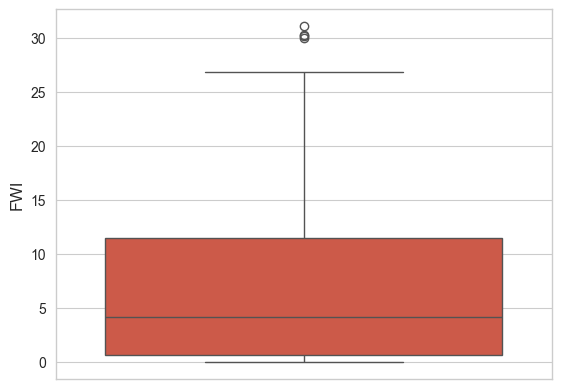

In [40]:
sns.boxplot(df['FWI'])

In [49]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

##### Why FWI?
because (FWI) is fire weather index: 0 to 31 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df_copy.drop('FWI', axis=1)
y = df['FWI']

In [55]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [56]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [57]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.drop(columns=['day','month','year'], axis = 1, inplace= True)

In [61]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

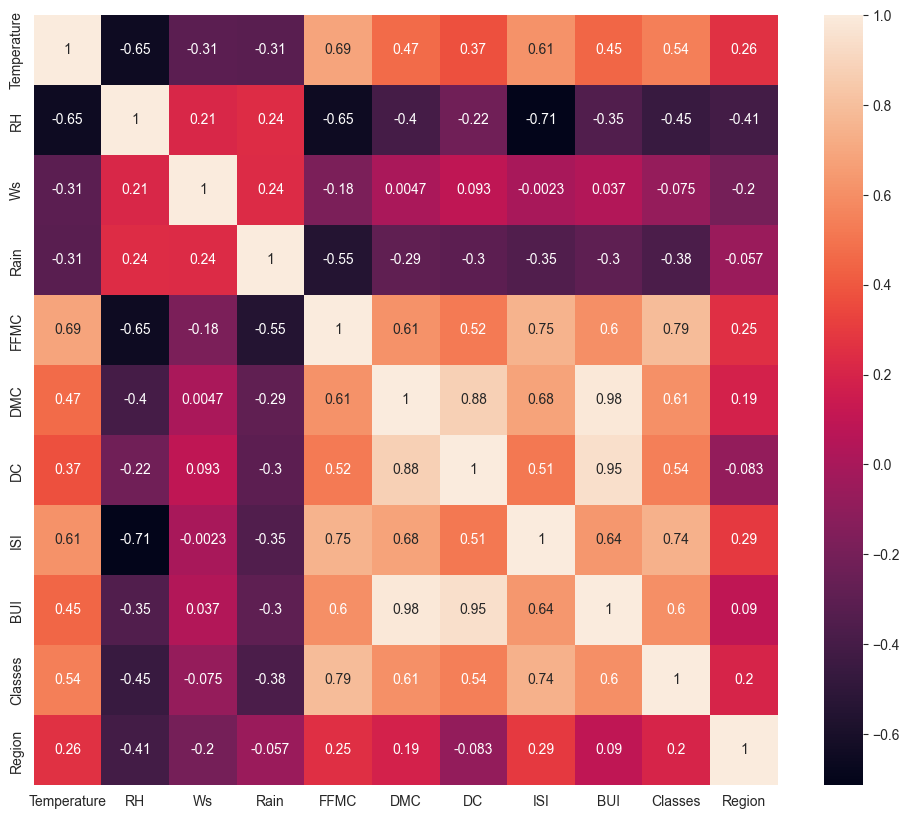

In [63]:
plt.figure(figsize=(12,10))
corr= X_train.corr()
sns.heatmap(corr, annot = True)

In [71]:
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [73]:
## threslod -- Domain Expert
corr_feature = correlation(X_train, 0.85)

In [76]:
corr_feature

{'BUI', 'DC'}

In [74]:
X_train.drop(corr_feature, axis=1, inplace = True)
X_test.drop(corr_feature, axis=1, inplace = True)

In [75]:
X_train.shape, X_test.shape

((194, 9), (49, 12))

In [82]:
X_test.drop(columns=['day','month','year'], axis = 1, inplace= True)

## Feature Scaling 

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0


In [85]:
scaler = StandardScaler()
X_train_shaped = scaler.fit_transform(X_train)
X_test_shaped = scaler.transform(X_test)

Text(0.5, 1.0, 'After Scaling')

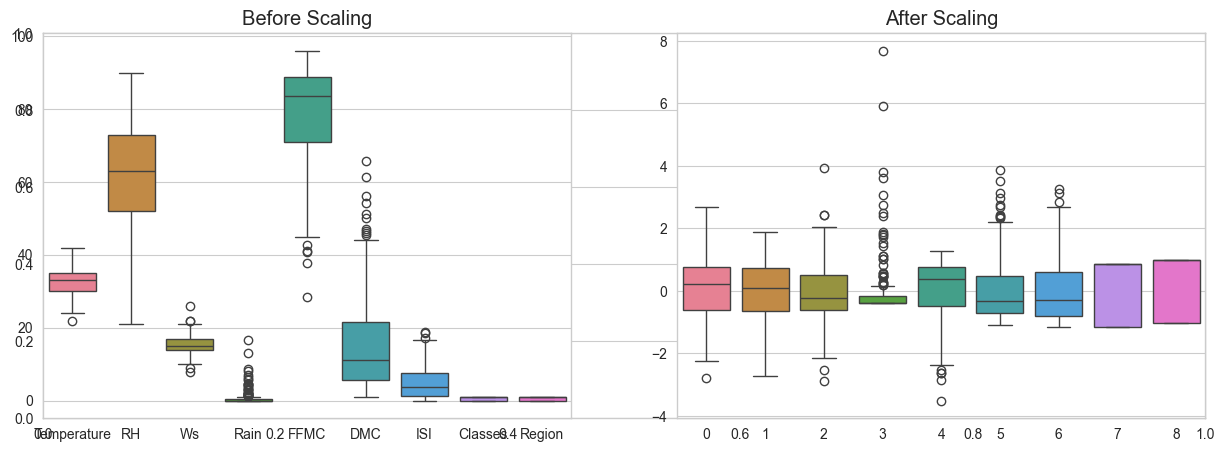

In [90]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data = X_train_shaped)
plt.title("After Scaling")

# Models

## 1. Linear Model

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [92]:
linear = LinearRegression()
linear.fit(X_train_shaped, y_train)

LinearRegression()

In [96]:
y_pred = linear.predict(X_test_shaped)

In [98]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)

MAE:  0.5049978694165663
R2 Score:  0.9805895859259883


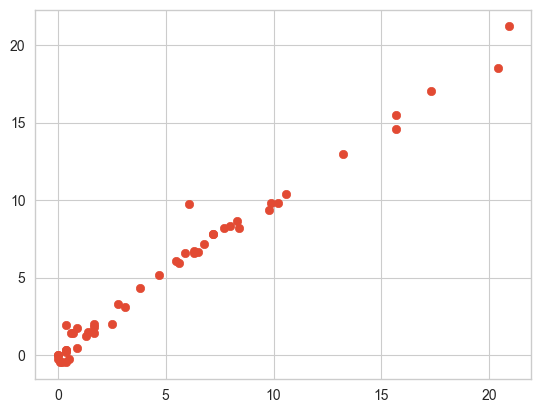

In [99]:
plt.scatter(y_test, y_pred)

## 2. Lasso Model

In [100]:
from sklearn.linear_model import Lasso

In [102]:
lasso =Lasso()
lasso.fit(X_train_shaped, y_train)

Lasso()

In [103]:
y_pred = lasso.predict(X_test_shaped)

In [104]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)

MAE:  1.0093958923873407
R2 Score:  0.9430507350726562


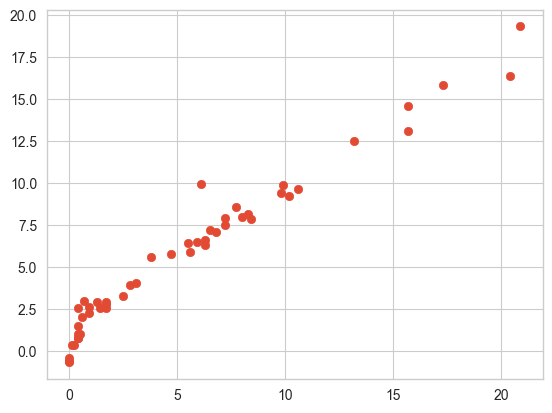

In [105]:
plt.scatter(y_test, y_pred)

### 2.1 LassoCV

In [114]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_shaped, y_train)

LassoCV(cv=5)

In [115]:
y_pred = lassocv.predict(X_test_shaped)

In [116]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)

MAE:  0.5556715031617872
R2 Score:  0.978328234520343


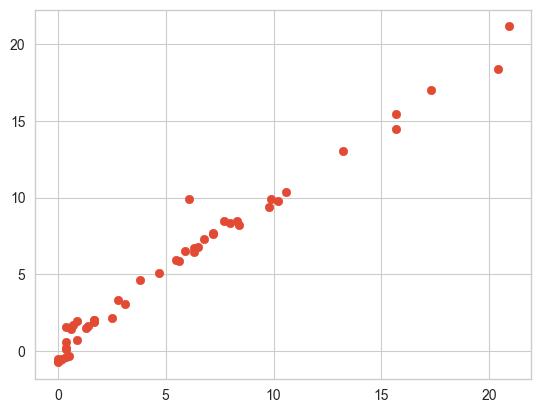

In [117]:
plt.scatter(y_test, y_pred)

## 3. Ridge Model

In [118]:
from sklearn.linear_model import Ridge

In [120]:
ridge = Ridge()
ridge.fit(X_train_shaped, y_train)

Ridge()

In [121]:
y_pred = ridge.predict(X_test_shaped)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)

MAE:  0.5192048325844728
R2 Score:  0.9801058063273602


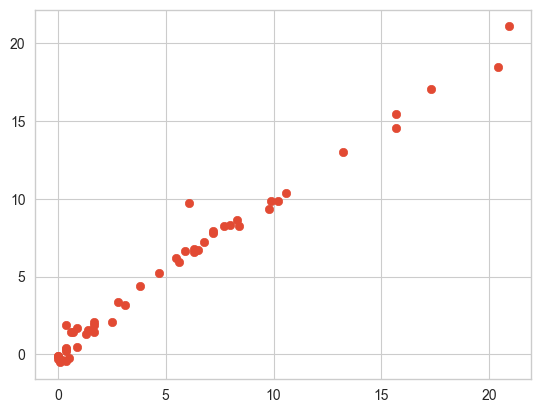

In [122]:
plt.scatter(y_test, y_pred)

### 3.1 RidgeCV

In [123]:
from sklearn.linear_model import RidgeCV

In [124]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_shaped, y_train)

RidgeCV(cv=5)

In [125]:
y_pred = ridgecv.predict(X_test_shaped)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)

MAE:  0.68692620082771
R2 Score:  0.9722193780965628


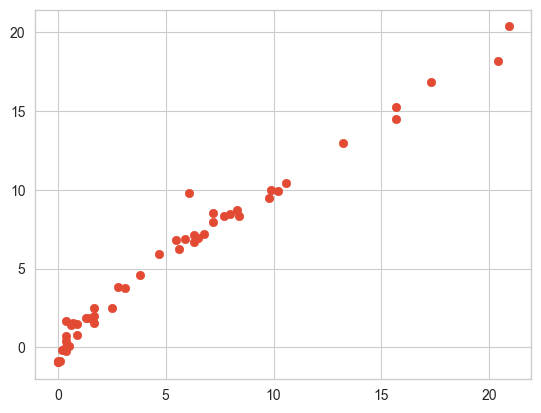

In [126]:
plt.scatter(y_test, y_pred)

## 4. ElasticNet Model

In [127]:
from sklearn.linear_model import ElasticNet

In [128]:
elastic = ElasticNet()
elastic.fit(X_train_shaped, y_train)

ElasticNet()

MAE:  1.6834416340136709
R2 Score:  0.8676961352267807


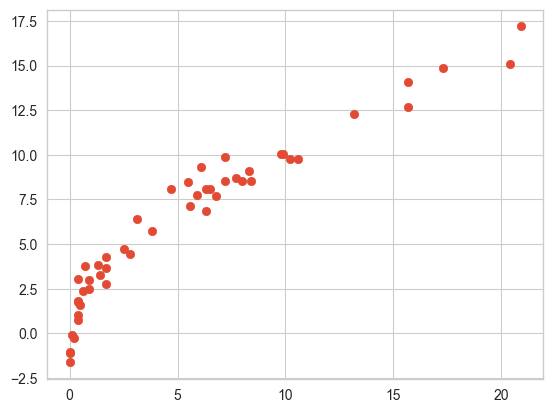

In [132]:
y_pred = elastic.predict(X_test_shaped)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)
plt.scatter(y_test, y_pred)

### 4.1 ElasticNetCV Model

In [133]:
from sklearn.linear_model import ElasticNetCV

In [136]:
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_shaped, y_train)

ElasticNetCV(cv=5)

MAE:  0.5710147088777218
R2 Score:  0.9781014571778188


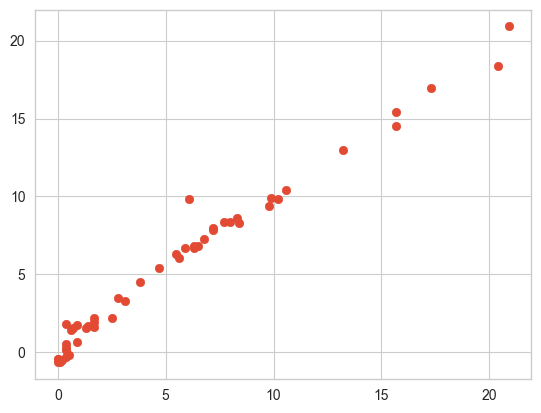

In [138]:
y_pred = elasticcv.predict(X_test_shaped)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: " ,mae)
print("R2 Score: " ,r2)
plt.scatter(y_test, y_pred)

#### Pickle the Machine Learning Models, Preprocessing Model standardscaler

In [143]:
#Ridge model having better accuracy
import pickle 
pickle.dump(scaler,open("scaler.pkl", "wb"))
pickle.dump(ridge,open("ridge.pkl", "wb"))